In [2]:
from scipy.stats import norm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
apipop = pd.read_csv("apipop.csv")

In [14]:
dnums = apipop["dnum"].unique(); len(dnums)

rng = np.random.default_rng()
clusters = rng.choice(dnums, 15, replace=False)
I = apipop.dnum.isin(clusters)
apipop[I].groupby("dnum").count()

,cds,stype,name,sname,snum,dname,cname,cnum,flag,pcttest,...,not.hsg,hsg,some.col,col.grad,grad.sch,avg.ed,full,emer,enroll,api.stu
dnum,,,,,,,,,,,,,,,,,,,,,
64,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
132,3,3,3,3,3,3,3,3,0,3,...,3,3,3,3,3,3,3,3,3,3
147,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
383,5,5,5,5,5,5,5,5,0,5,...,5,5,5,5,5,5,5,5,5,5
401,552,552,552,552,552,552,552,552,0,552,...,552,552,552,552,552,533,552,552,552,552
406,2,2,2,2,2,2,2,2,0,2,...,2,2,2,2,2,2,2,2,2,2
538,7,7,7,7,7,7,7,7,0,7,...,7,7,7,7,7,7,7,7,7,7
553,3,3,3,3,3,3,3,3,0,3,...,3,3,3,3,3,3,3,3,3,3
556,26,26,26,26,26,26,26,26,0,26,...,26,26,26,26,26,20,26,26,26,26


In [242]:
flights = pd.read_csv("clustersampleflights.csv", usecols=["carrier", "dep_delay"]).dropna(axis=0)
flights.head()
len(flights)

144241

In [241]:
flights = pd.read_csv("~/Downloads/2013_NYC_Flights_Data.csv")
len(flights)

336776

In [91]:
N = 16 # given
M = 336776 # given
Mbar = M/N
print(f"Mbar = {Mbar}")

Mbar = 21048.5


In [102]:
Ms = flights.carrier.value_counts()
Ms

carrier
UA    57979
B6    54169
AA    32093
Name: count, dtype: int64

In [83]:
carriers = flights.carrier.unique()
n = len(carriers)
assert n == 3
print(f"carriers = {carriers} ({len(carriers)})")

carriers = ['UA' 'AA' 'B6'] (3)


In [110]:
Ybar = flights.dep_delay.mean()
Ybar

11.667043351058298

In [127]:
cluster_means = flights.groupby("carrier").mean().dep_delay
cluster_means

carrier
AA     8.586016
B6    13.022522
UA    12.106073
Name: dep_delay, dtype: float64

In [128]:
np.sum((cluster_means*Ms - Ybar*Ms)**2)/(n-1)

7908145773.211962

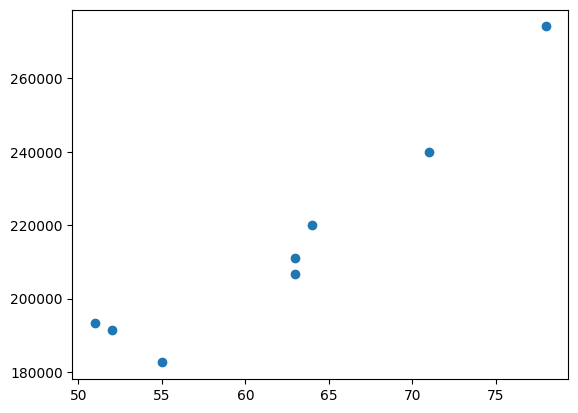

In [130]:
M = np.array([55, 63, 71, 78, 52, 64, 51, 63])
Ybar = np.array([3320, 3280, 3379, 3514, 3681, 3440, 3789, 3350])
t = M*Ybar
plt.plot(M, t, 'o')

$$
\begin{aligned}
\sum_{i\in U}\tau_i = \left(\frac{\sum_{i\in U}\tau_i}{\sum_{i\in U}M_i}\right)\sum_{i\in U}M_i
\end{aligned}
$$

$$
\frac{\sum_{i=1}^n\tau_i}{\sum_{i=1}^nM_i} = 
\frac{\sum_{i=1}^nM_i\bar{y}_i}{\sum_{i=1}^nM_i} = 
$$

$$
\hat\tau = N\bar{y}
$$

$$
\left(1-\frac n N\right)\frac1{n\bar{x}_U}\frac{\sum(M_i\bar{y}_i - M_i\bar{y})^2}{n-1}
$$

$$
\left(1-\frac n N\right)\frac{1}{\bar{M}^2}\frac{S^2}{n}
$$

$$
\bar{x}_U = \frac{\sum_{i=1}^N M_i}{N} = \bar{M}
$$

### Problem
A survey is to be designed to estimate how much a single-family home spends annually on utilities in a certain Alberta town. The town is divided up into 60 different *wards*, of which 8 are randomly picked. Each household in the eight randomly picked wards is then send a survey, and asked to give the yearly amount spent on gas, water, and electricity. The results are summarized in the table below. There are a total of 4200 homes in this town.

| Ward | # houses | average spend per house |                  
| ---- | -------- | ----------------------- |
| 0    | 55       | 3320                    |
| 1    | 63       | 3280                    |
| 2    | 71       | 3379                    |
| 3    | 78       | 3514                    |
| 4    | 52       | 3681                    |
| 5    | 64       | 3440                    |
| 6    | 51       | 3789                    |
| 7    | 63       | 3350                    |

Estimate the average annual amount spent on utilities by a single household and the associated standard error.


### Solution

Let $N$ be the total number of wards (60).

Let $M_i$ be the number of houses in ward $i$.

Let $y_{ij}$ be the annual amount spent on utilities by home $j$ in ward $i$.

We want to estimate the population mean
$$
B = \frac{\displaystyle\sum_{i<N}\sum_{j<M_i}y_{ij}}{\displaystyle\sum_{i<N}M_i}.
$$

Let $y_i$ be the average annual amount spent on utilities by a home in ward $i$:
$$
\displaystyle \bar{y}_i = \frac{\displaystyle\sum_{j < M_i}y_{ij}}{M_i}.
$$
Then
$$B = \frac{\displaystyle\sum_{i<N}M_i\bar{y}_i}{\displaystyle\sum_{i<N}M_i}.$$

Note that $B$ is a *ratio*.

### Estimation of $B$

Let $n$ be the number of wards surveyed (8).

We estimate $B$ by the sample ratio:
$$\hat{B} = \frac{\displaystyle\sum_{i<n}M_i\bar{y}_i}{\displaystyle\sum_{i<n}M_i}.$$

Note that $M_i$ and $\bar{y}_i$, $i<n$, are given in the second and third columns of the data table, respectively.

In [165]:
Mi = np.array([55, 63, 71, 78, 52, 64, 51, 63])
ybari = np.array([3320, 3280, 3379, 3514, 3681, 3440, 3789, 3350])
Bhat = np.sum(Mi*ybari)/Mi.sum()
print(f"The average annual amount spent on utilities by a single household is approximately ${int(Bhat)}.")

The average annual amount spent on utilities by a single household is approximately $3458.


### Standard error of $\hat{B}$

Converting the formula for the variance of a ratio estimator into the notation of this problem, we have:
$$
\mathbb{V}(\hat{B}) = \left(1-\frac nN\right)\left(\frac{N}{M}\right)\frac{s^2}{n},
$$
where
$$
M =\sum_{i < N}M_i\qquad\text{and}\qquad s^2 = \frac1{n-1}\sum_{i=1}^n(M_i\bar{y}_i - M_i\hat{B})^2.
$$

Note that $M=4200$.

In [157]:
N = 60
n = 8
M = 4200
s2 = np.sum((Mi*ybari - Mi*Bhat)**2)/(n-1)
v = (1-n/N)*(N/M)**2*s2/n
se = np.sqrt(v)
print(f"The standard error of Bhat is approximately {int(se)}.")
print(f"The 95% confidence interval for Bhat is [{int(Bhat - 1.96*se)}, {int(Bhat + 1.96*se)}].")

The standard error of Bhat is approximately 47.
The 95% confidence interval for Bhat is [3366, 3551].


### Problem

 A company is considering revising its retirement policy and wants to estimate the proportion of employees that favour the new policy. This company owns 87 separate manufacturing plants. Because decisions about the retirement policy are urgent, data must be collected and throughly analyzed in a quick manner (with little cost). A simple random sample of 10 plants is chosen, and the opinion of each worker in each chosen plant is recorded. Here are the results:
 
| Plant | # employees | # in favor |                  
| ----- | ----------- | ---------- |
| 0     | 55          | 41         |
| 1     | 62          | 53         |
| 2     | 73          | 45         |
| 3     | 101         | 63         |
| 4     | 73          | 54         |
| 5     | 61          | 45         |
| 6     | 58          | 51         |
| 7     | 65          | 46         |
| 8     | 49          | 37         |
| 9     | 55          | 42         |

Estimate the proportion of all employees that are in favor of the new retirement policy, with 95% confidence.

### Solution

Let $N$ be the total number of plants (87).

Let $M_i$ be the number of employees at the $i$-th plant. Then the total number of employees at all plants is
$$
M = \sum_{i<N}M_i
$$

For $i<N$ $y_{ij}$, be $1$ if the $j$-th employee at the $i$-th plant supports the retirement policy revision and $0$ otherwise. Then
$$
B = \frac{\displaystyle\sum_{i<n}\sum_{j<M_i}y_{ij}}{\displaystyle\sum_{i<N}M_i}
$$
is the proportion of employees at all plants who support the revision.

As in the previous example, we estimate $B$ by
$$\hat{B} = \frac{\displaystyle\sum_{i<n}M_i\bar{y}_i}{\displaystyle\sum_{i<n}M_i},
\qquad\text{where}\qquad
\bar{y}_i = \frac1{M_i}\sum_{j < M_i}y_{ij}
$$
is the proportion of employees at plant $i$ who support the retirement policy revision.

In [164]:
Mi = np.array([55, 62, 73, 101, 73, 61, 58, 65, 49, 55])
ybari = np.array([41, 53, 45, 63, 54, 45, 51, 46, 37, 42])/Mi
Bhat = np.sum(Mi*ybari)/Mi.sum()
print(f"The proportion of employees who support the retirement policy revision is approximately {Bhat:.2f}.")

The proportion of employees who support the retirement policy revision is approximately 0.73.


Although we don't know $M$, we can still estimate
$$
\mathbb{V}(\hat{B}) = \left(1-\frac nN\right)\left(\frac{N}{M}\right)\frac{s^2}{n}
$$
using the approximation
$$
\frac{M}{N} \approx \dfrac{m}{n}\qquad\text{where}\qquad m = \sum_{i<N}M_i.
$$


In [163]:
N = 87
n = 10
m = Mi.sum()
s2 = np.sum((Mi*ybari - Mi*Bhat)**2)/(n-1)
v = (1-n/N)*(n/m)**2*s2/n
se = np.sqrt(v)
print(f"The standard error of Bhat is approximately {int(se)}.")
print(f"The 95% confidence interval for Bhat is [{Bhat - 1.96*se:.2f}, {Bhat + 1.96*se:.2f}].")

The standard error of Bhat is approximately 0.
The 95% confidence interval for Bhat is [0.68, 0.79].


## Systematic sampling

Let $U=\{0,1\ldots,M-1\}$ be a population of size $M$.

A systematic sample of a population with period $n\geq 1$ is a sample of the form
$$
C_i = \{i, i + N, i + 2N, \ldots, i + (M_i-1)N\},
$$
for some choice of $i < N$, where
$$
M_i = \left\lfloor\frac{M-i-1}{N}\right\rfloor + 1.
$$

$M_i$ is defined this way so that $C_i$ has size $M_i$. (Exercise: Justify this.)

The sets $C_0,\ldots,C_{N-1}$ form a *clustering* of $U$ of size $N$.

Our systematic sample $C_i$ of $U$ is a clustered sampling of $U$ with $n=1$.







### Example
Suppoes $M=520$ and $N=25$. Compute $M_i$ for $i<25$.

### Solution

In [196]:
M = 520
N = 25
Mi = np.floor((K - np.arange(N) - 1)/N).astype(int) + 1
assert Mi.sum() == M # check
assert all([i + (Mi[i] - 1)*N < M and i + Mi[i]*N >= M for i in range(N)]) # check
Mi

array([21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 20, 20, 20, 20, 20])

### Example

A forester wants to estimate the average amount of timber volume per acre in a region that consists of 520 one-acre plots. A systematic sample was with period $N=25$ was chosen at random. It produced the following data:

| Plot | Volume | Plot | Volume |
| ---- | ------ | ---- | ------ |
| 3    | 7030   | 278  | 7540   |
| 28   | 6720   | 303  | 6720   |
| 53   | 6850   | 328  | 6900   |
| 78   | 7210   | 353  | 7200   |
| 103  | 7150   | 378  | 7100   |
| 128  | 7375   | 403  | 6960   |
| 153  | 7200   | 428  | 6850   |
| 178  | 6950   | 453  | 7125   |
| 203  | 6670   | 478  | 7485   |
| 228  | 6970   | 503  | 7090   |
| 253  | 7280   |      |        |

In [199]:
M = 520
N = 25
Mi = np.floor((K - np.arange(N) - 1)/N).astype(int) + 1
assert Mi.sum() == M # check
assert all([i + (Mi[i] - 1)*N < M and i + Mi[i]*N >= M for i in range(N)]) # check
Mi

array([21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 20, 20, 20, 20, 20])

$$
\hat{B} = \frac{M_i\bar{y}_i}{M_i} = \bar{y}_i
$$
The average timber volume per acre is:

In [200]:
yij = np.array([7030, 6720, 6850, 7210, 7150, 7375, 7200, 6950, 6670, 6970, 7280, 7540, 6720, 6900, 7200, 7100, 6960, 6850, 7125, 7485, 7090])
ybari = yij.mean()
ybari

7065.476190476191

$$
\mathbb{V}(\hat{B}) = \left(1-\frac 1N\right)\left(\frac{N}{M}\right)s^2,\qquad
s^2 = \frac1{n-1}\sum_{i=1}^n(M_i\bar{y}_i - M_i\hat{B})^2.
$$


In [236]:
n = Mi[3]
s = np.sqrt(np.sum((yij - ybari)**2)/(n-1))
se = np.sqrt(1-n/M)*s/np.sqrt(n)
se


51.542590314651186

In [237]:
yij.mean() - 1.96*se ,yij.mean() + 1.96*se

(6964.452713459475, 7166.499667492907)